# Validate login by time, service and user

In [1]:
#!pip install -r ../requirements.txt

tt

Lode the test data

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('login_data/login_data_ola_oslo_sunday.csv')
df.head()

,geography,service,user,weekday
0,Kristiansand,brukeranmeldelser,Kari,Sunday
1,Trondheim,meldinger,Kari,Sunday
2,Stavanger,innstillinger,Nils,Sunday
3,Bergen,innstillinger,Nils,Sunday
4,Stavanger,brukeranmeldelser,Per,Sunday


In [3]:

#df['user'].unique()
import ipywidgets as widgets
from IPython.display import display

# Hent en liste av unike brukere
unique_users = df['user'].unique()

# Lag en dropdown-liste med unike brukere
user_dropdown = widgets.Dropdown(options=unique_users)
# Vis dropdown-listen
display(user_dropdown)  # Viser brukeren 'per'

Dropdown(options=('Kari', 'Nils', 'Per', 'Anne', 'Ola'), value='Kari')

In [4]:
unique_services = df['service'].unique()
service_dropdown = widgets.Dropdown(options=unique_services)
display(service_dropdown)

Dropdown(options=('brukeranmeldelser', 'meldinger', 'innstillinger', 'profil'), value='brukeranmeldelser')

## User by service and weekday

In [5]:
!pip install seaborn

import seaborn as sns


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
# selectedUser = 'Ola'
selectedUser = user_dropdown.value
selectedService = service_dropdown.value
# Filtrer dataene for brukeren 'per' og tjenesten 'brukeranmeldelser'
filtered_df = df[(df['user'] == selectedUser) & (df['service'] == selectedService)]
# Få ukedagen som et tall
#filtered_df['date'] = pd.to_datetime(filtered_df['date'])
#filtered_df['weekday'] = filtered_df['date'].dt.dayofweek

# Grupper etter 'weekday' og tell antall pålogginger
weekday_counts = filtered_df['weekday'].value_counts().sort_index()
weekday_counts



Friday       27
Monday       23
Saturday     28
Sunday       24
Thursday     37
Tuesday      21
Wednesday    37
Name: weekday, dtype: int64

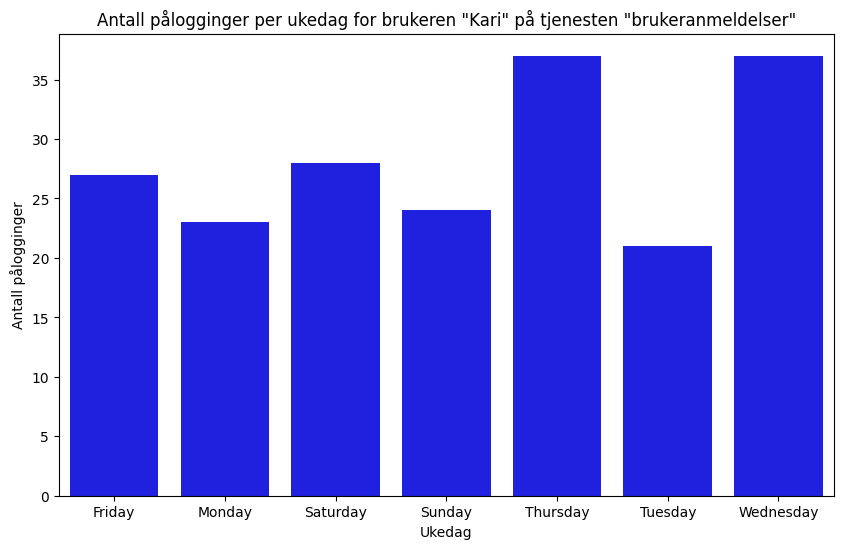

In [7]:
# Lag en barplot for å visualisere antall pålogginger per ukedag
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, color='b')
plt.xlabel('Ukedag')
plt.ylabel('Antall pålogginger')
plt.title(f'Antall pålogginger per ukedag for brukeren "{selectedUser}" på tjenesten "{selectedService}"')
plt.show()

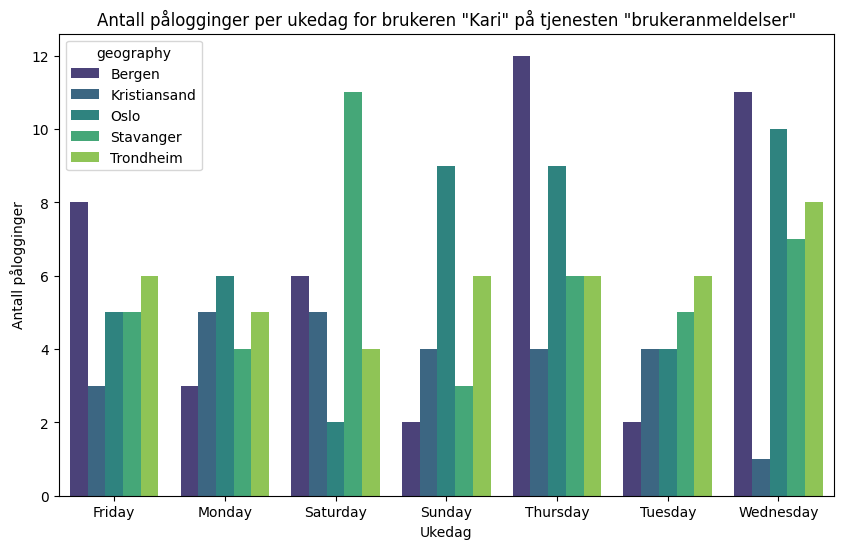

In [8]:

# selectedUser = 'Ola'
# Filtrer dataene for brukeren 'per' og tjenesten 'brukeranmeldelser'
# filtered_df = df[(df['user'] == selectedUser) & (df['service'] == 'brukeranmeldelser')]

# Få ukedagen som et tall
# filtered_df['date'] = pd.to_datetime(filtered_df['date'])
# filtered_df['weekday'] = filtered_df['date'].dt.dayofweek

# Grupper etter 'weekday' og 'geography' og tell antall pålogginger
grouped_df = filtered_df.groupby(['weekday', 'geography']).size().reset_index(name='counts')

# Lag en gruppe barplot for å visualisere antall pålogginger per ukedag for hver geografisk region
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='counts', hue='geography', data=grouped_df, palette='viridis')
plt.xlabel('Ukedag')
plt.ylabel('Antall pålogginger')
plt.title(f'Antall pålogginger per ukedag for brukeren "{selectedUser}" på tjenesten "{selectedService}"')
plt.show()

# KAN

In [9]:

from kan import *

from sklearn.model_selection import train_test_split
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)

cpu


# KANimport matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Konvertere kategoriske data til numeriske verdier
df['weekday'] = df['weekday'].astype('category').cat.codes
df['geography'] = df['geography'].astype('category').cat.codes
df['service'] = df['service'].astype('category').cat.codes
df['user'] = df['user'].astype('category').cat.codes

# Velge relevante kolonner for KAN
data_for_kan = df[['weekday', 'geography', 'service', 'user']]
data_for_kan.head()

,weekday,geography,service,user
0,3,1,0,1
1,3,4,2,1
2,3,3,1,2
3,3,0,1,2
4,3,3,0,4


In [11]:
# Skriv ut unike verdier fra 'weekday'-kolonnen
unique_values = df['weekday'].unique()
print(unique_values)

[3 1 5 6 4 0 2]


In [12]:
# Konvertere til numpy arrays
X = data_for_kan.values
y = np.zeros(X.shape[0])  # Placeholder for målvariabel, kan brukes for unsupervised læring

# Konvertere til PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Splitte datasettet i trenings- og testsett
train_data, test_data, train_target, test_target = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Opprett data loaders (valgfritt, hvis du vil batch og shuffle data)
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

train_inputs = torch.empty(0, 4, device=device)
train_labels = torch.empty(0, dtype=torch.long, device=device)
test_inputs = torch.empty(0, 4, device=device)
test_labels = torch.empty(0, dtype=torch.long, device=device)

for data, labels in train_loader:
    train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
    train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

for data, labels in test_loader:
    test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
    test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

dataset = {
    'train_input': train_inputs,
    'test_input': test_inputs,
    'train_label': train_labels,
    'test_label': test_labels
}


Directory already exists: ./model


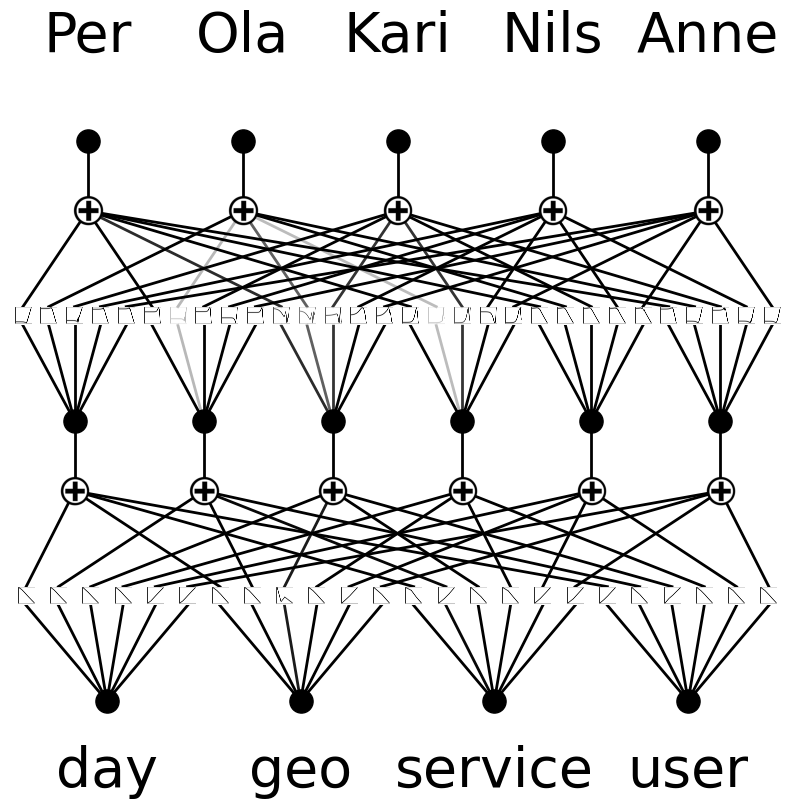

In [13]:
image_folder = 'video_img'
# Initialisere KAN med nødvendige parametere
model = KAN(width=[4, 6, 5], grid=5, k=3, seed=0, device=device)
model(dataset['train_input'])
model.plot(beta=100, scale=1, in_vars=['day', 'geo', 'service', 'user'], out_vars=['Per', 'Ola', 'Kari', 'Nils', 'Anne'])

In [14]:
 # Definere trenings- og testfunksjoner for nøyaktighet
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

# Trene modellen
results = model.train(dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=50, lamb=0.01, lamb_entropy=10., save_fig=True, img_folder=image_folder)


print(f"Train accuracy: {results['train_acc'][-1]}, Test accuracy: {results['test_acc'][-1]}")


train loss: 0.00e+00 | test loss: 0.00e+00 | reg: 9.13e+01 : 100%|██| 50/50 [05:36<00:00,  6.74s/it]

Train accuracy: 1.0, Test accuracy: 1.0


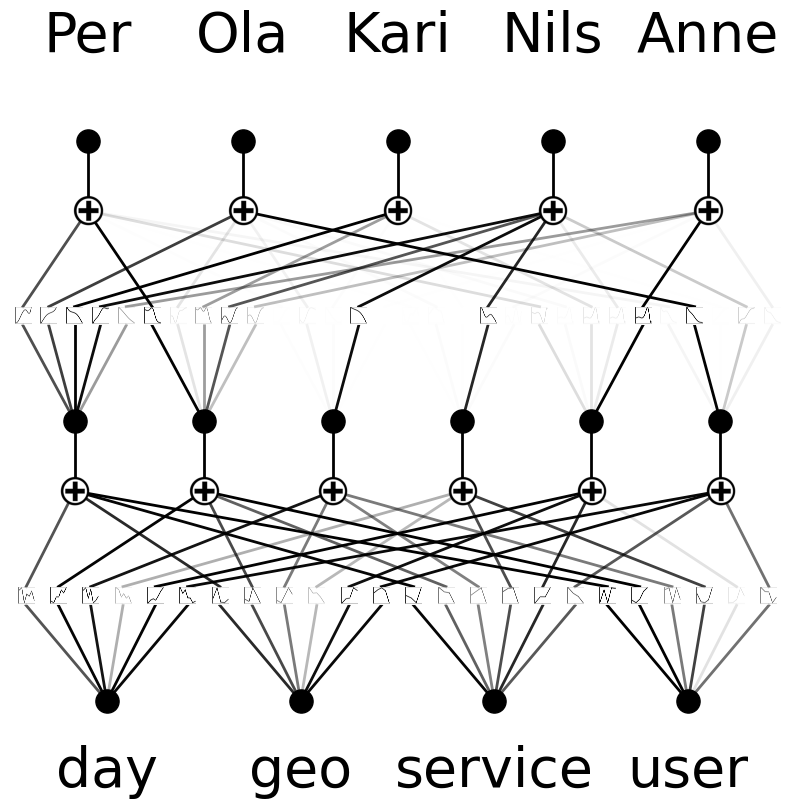

In [15]:
# model.plot(scale=1, in_vars=['SL', 'SW', 'PL', 'PW'], out_vars=['Set', 'Ver', 'Vir'])
model.plot(scale=1, in_vars=['day', 'geo', 'service', 'user'], out_vars=['Per', 'Ola', 'Kari','Nils', 'Anne'])

In [16]:
## Video 
import os
import numpy as np
import moviepy.video.io.ImageSequenceClip # moviepy == 1.0.3

video_name='video'
fps=1

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_gif(video_name+'.gif')

MoviePy - Building file video.gif with imageio.


#![Learning cycle](video.gifff"Learning cyclus")

In [34]:

# Opprett en tom DataFrame med de nødvendige kolonnene
check_df = pd.DataFrame(columns=['user', 'service', 'geography', 'weekday'])

# Lag en ny DataFrame med de gitte verdiene
new_row = pd.DataFrame([['Nils', 'brukeranmeldelser', 'Stavanger', 'Sunday']], columns=['user', 'service', 'geography', 'weekday'])

# Legg til den nye raden i den opprinnelige DataFrame ved hjelp av concat
check_df = pd.concat([check_df, new_row], ignore_index=True)

# Konverter kategoriske data til numeriske verdier
check_df['user'] = 0 #check_df['user'].astype('category').cat.codes
check_df['service'] = 1 #check_df['service'].astype('category').cat.codes
check_df['geography'] = 2 #check_df['geography'].astype('category').cat.codes
check_df['weekday'] = 6 #check_df['weekday'].astype('category').cat.codes

# Skriv ut DataFrame
print(check_df)
# Konverter DataFrame til PyTorch tensor
check_data = torch.tensor(df.values, dtype=torch.float32)

# Lag en ordbok 'dataset'
check_dataset = {
    'input': check_data
}

print(check_dataset)
predictions = model(check_dataset['input'])

# Skriv ut prediksjonene
print(predictions)

   user  service  geography  weekday
0     0        1          2        6
{'input': tensor([[1., 0., 1., 3.],
        [4., 2., 1., 3.],
        [3., 1., 2., 3.],
        ...,
        [0., 3., 0., 3.],
        [2., 3., 0., 3.],
        [1., 1., 4., 3.]])}
tensor([[ 756.7760,   42.2143, -203.9337, -433.4341,  -75.1501],
        [ 739.0244,   42.0473, -202.3689, -429.2957,  -74.6359],
        [ 753.3707,   43.4858, -203.0808, -433.3769,  -76.2473],
        ...,
        [ 754.5198,   39.3357, -203.4895, -434.3732,  -78.4509],
        [ 748.3629,   39.5535, -201.2379, -432.1863,  -75.8178],
        [ 615.1698,   42.4995, -164.0590, -363.3172,  -22.9071]],
       grad_fn=<AddBackward0>)


In [33]:
#model.eval()
#model.plot()
# Gjør en prediksjon
predictions = model(check_dataset['input'])

# Skriv ut prediksjonene
print(predictions)

tensor([[ 756.7760,   42.2143, -203.9337, -433.4341,  -75.1501],
        [ 739.0244,   42.0473, -202.3689, -429.2957,  -74.6359],
        [ 753.3707,   43.4858, -203.0808, -433.3769,  -76.2473],
        ...,
        [ 754.5198,   39.3357, -203.4895, -434.3732,  -78.4509],
        [ 748.3629,   39.5535, -201.2379, -432.1863,  -75.8178],
        [ 615.1698,   42.4995, -164.0590, -363.3172,  -22.9071]],
       grad_fn=<AddBackward0>)
